In [9]:
import pandas as pd
import numpy as np
from scipy.stats import poisson 


In [7]:
df_race=pd.read_csv("race-updated.csv")
df_shooting=pd.read_csv("fatal-police-shootings-data.csv")

In [6]:
races = ["A", "W", "H", "B", "N", "O"]
killed_per_race = []

for i in races:
    i_killings = df_shooting.race.loc[(df_shooting.race==i)].count()
    killed_per_race.append(i_killings)
    
print (killed_per_race)

[113, 3204, 1135, 1695, 100, 46]


In [10]:
df_race["wtotal"]=pd.Series(df_race["WhiteTotal"].sum())
df_race["btotal"]=pd.Series(df_race["BlackTotal"].sum())
df_race["itotal"]=pd.Series(df_race["IndianTotal"].sum())
df_race["atotal"]=pd.Series(df_race["AsianTotal"].sum())
df_race["htotal"]=pd.Series(df_race["HawaiianTotal"].sum())
df_race["ototal"]=pd.Series(df_race["OtherTotal"].sum())

In [12]:
prop_killed_per_race = []

for i in races:
    
    if i == "A":
        prop_i_killed = killed_per_race[0]/18427519.0
        print (prop_i_killed)
    elif i == "W":
        prop_i_killed = killed_per_race[1]/231913264.0
        print (prop_i_killed)
    elif i == "B":
        prop_i_killed = killed_per_race[3]/41595290.0
        print (prop_i_killed)
    elif i == "N":
        prop_i_killed = killed_per_race[4]/2694311.0
        print (prop_i_killed)
    else:
        prop_i_killed = killed_per_race[5]/34582904.0

        print (prop_i_killed)
    
    prop_killed_per_race.append(prop_i_killed)

6.132133142828397e-06
1.3815509922709725e-05
1.3301369948573434e-06
4.074980604775204e-05
3.711524022282506e-05
1.3301369948573434e-06


In [1]:
import matplotlib.pyplot as plt

In [3]:
pop_r = {'W': 60.7, # white - % population by race 
         'B': 13.4, # black or african american
         'H': 18.1, # hispanic or latino
         'A': 5.8,  # asian
         'N': 1.5,  # american indian, alaska native, naitive hawaiian, and other pacific islander
         'O': 0.5}  # other

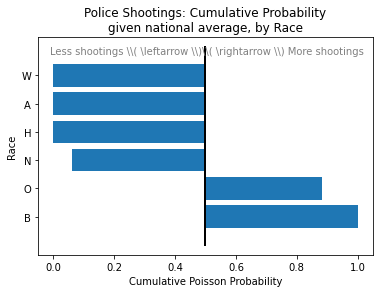

In [10]:
# Compute the cumulative Poisson distribution value for each race
cum_poisson_vals = []
for race in pop_r.keys():
    lam = df_shooting.shape[0]*pop_r[race]/100 #shootings if matched avg
    k = df_shooting[df_shooting.race==race].shape[0] #actual number of shootings
    cum_poisson_vals.append(poisson.cdf(k, lam))


# Plot cumulative Poisson distribution values
plt.figure()
EK = pd.DataFrame(data={'race': list(pop_r.keys()), 
                        'cum_poisson': cum_poisson_vals})
EK.sort_values('cum_poisson', inplace=True)

y = np.arange(len(EK.race))
plt.barh(y, EK.cum_poisson-0.5, left=0.5)
plt.plot([0.5, 0.5], [y[0]-1, y[-1]+1], 'k', linewidth=2)
ax = plt.gca()
ax.set_yticks(y)
ax.set_yticklabels(EK.race)
ax.invert_yaxis()
plt.title('Police Shootings: Cumulative Probability\n' +
          'given national average, by Race')
plt.ylabel('Race')
plt.xlabel('Cumulative Poisson Probability')
plt.text(0.506, y[0]-0.75, 
         (r'Less shootings \\( \leftarrow \\)' + 
          r'\\( \rightarrow \\) More shootings'),
         horizontalalignment='center', color='gray')
plt.show()

In [13]:
EK.to_csv(r"C:\Users\renur\OneDrive\Documents\My Tableau Repository\Datasources\BIDV project")

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\renur\\OneDrive\\Documents\\My Tableau Repository\\Datasources\\BIDV project'